## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('youtube_kr.csv', index_col=0)
df.head(5)

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,tags_split,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,"['보겸', 'bokyem']",2,5947503,61,53326,105756,139946,0,0,0
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12 00:00:00,Wednesday,2020-08-12 00:00:00,1900-01-01 09:00:08,Wednesday,...,"['총몇명', '재밌는 만화', '부락토스', '루시퍼', '총몇명 프리퀄', '총...",6,963384,228,28244,494,3339,0,0,1
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,"['양팡', '양팡유튜브', '팡튜브', '가족시트콤', '양팡가족', '양팡가족시...",27,2950885,0,17974,68898,50688,0,0,0
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,"['꽈뚜룹', '한국여행기', 'quaddurup', '뚜룹이', 'korea', ...",12,1743374,81,36893,1798,8751,0,0,1
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,"['JYP Entertainment', 'JYP', 'J.Y.Park', 'JYPa...",13,3433885,257,353337,9763,23405,0,0,1


## 데이터전처리

In [2]:
import numpy as np

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df
df = reduce_mem_usage(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79541 entries, 0 to 79540
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           79541 non-null  object
 1   video_title        79541 non-null  object
 2   channel_id         79541 non-null  object
 3   channel_title      79541 non-null  object
 4   category           79541 non-null  int8  
 5   trending_date      79541 non-null  object
 6   trending_week      79541 non-null  object
 7   publishedAt_date   79541 non-null  object
 8   publishedAt_time   79541 non-null  object
 9   publishedAt_week   79541 non-null  object
 10  duration           79541 non-null  int8  
 11  tags_split         79541 non-null  object
 12  tags_len           79541 non-null  int16 
 13  view_count         79541 non-null  int32 
 14  play_time          79541 non-null  int32 
 15  likes              79541 non-null  int32 
 16  dislikes           79541 non-null  int32

In [3]:
# 첫번째로 인기동영상이 된 데이터가 의미 있다고 판단.
df=df.drop_duplicates(['video_id'], keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10921 entries, 0 to 79362
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  object
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  object
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

In [4]:
# 추가 데이터
df["video_len"]=0
df["channel_len"]=0

for i in range(len(df)):    
    df["video_len"].iloc[i]=len(df["video_title"].iloc[i])
    df["channel_len"].iloc[i]=len(df["channel_title"].iloc[i])

C:\Users\yhg31\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
df["duration"].describe()

count   10921.00
mean        7.28
std         3.07
min         1.00
25%         5.00
50%         7.00
75%         9.00
max        24.00
Name: duration, dtype: float64

In [6]:
#인기 영상이 되는 일수를 일주일은 너무 긴거 같아서 25%의 값인 5로 잡음
df1=df[df["duration"]>5]
df2=df[df["duration"]<=5]
df1["pred"]=1
df2["pred"]=0
df=pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True)
df

C:\Users\yhg31\AppData\Local\Temp/ipykernel_14176/3216267614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pred"]=1
C:\Users\yhg31\AppData\Local\Temp/ipykernel_14176/3216267614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pred"]=0


,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,61,53326,105756,139946,0,0,0,11,5,1
1,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,0,17974,68898,50688,0,0,0,15,11,1
2,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,81,36893,1798,8751,0,0,1,20,13,1
3,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,257,353337,9763,23405,0,0,1,48,17,1
4,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:13,Tuesday,...,20,714301,15176,31040,0,0,1,25,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,esQPl9_rA6U,전국민의 99%가 홍합으로 알고 먹는 이것의 정체,UCY2uWQDCzn_ZE-JpTfDRR2A,입질의추억TV jiminTV,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday,...,799,4509,135,407,0,0,1,27,15,0
10917,WL4ipAjcspE,[웰메이드 X 임영웅] 21FW 시즌 화보 촬영 비하인드 영상 공개,UCgeeQuH16jS4UEOIxc-kwoQ,웰메이드,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday,...,410,17438,57,1136,0,0,1,37,4,0
10918,yqLla5LbpH8,사랑인가? 증오인가? 애정과 비명이 난무하는 아리랑은고양이 채널 통역!,UC69l_rtlCQ7M4Mz2RCS80BA,미야옹철의 냥냥펀치,15,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday,...,744,4399,34,280,0,0,1,39,10,0
10919,n028FLMfsSY,송편 안에 100만원이 들어가 있는 100만원짜리 대왕 송편 선물하기,UC1dK7oMUSR9Rnk1BSpOKZng,정선호,22,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday,...,917,6545,168,561,0,0,1,38,3,0


In [7]:
#데이터를 불러올때마다 날짜와 관련된 코드는 이상이 있음
df.iloc[:, 5:10]

,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week
0,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday
1,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday
2,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday
3,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday
4,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:13,Tuesday
...,...,...,...,...,...
10916,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday
10917,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday
10918,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday
10919,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday


In [8]:
df["trending_week"]=df["trending_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["publishedAt_week"]=df["publishedAt_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["trending_date"]=df["trending_date"].str.split(' ').str[0]
df["publishedAt_date"]=df["publishedAt_date"].str.split(' ').str[0]
df["publishedAt_time"]=df["publishedAt_time"].str.split(' ').str[1]

In [9]:
df["trending_week"].value_counts()

4    1635
3    1607
2    1603
0    1588
5    1583
6    1519
1    1386
Name: trending_week, dtype: int64

In [10]:
df["publishedAt_week"].value_counts()

4    1792
3    1719
2    1634
1    1523
0    1476
5    1459
6    1318
Name: publishedAt_week, dtype: int64

In [11]:
df.iloc[:, 5:9]

,trending_date,trending_week,publishedAt_date,publishedAt_time
0,2020-08-12,2,2020-08-09,09:32:48
1,2020-08-12,2,2020-08-10,09:54:13
2,2020-08-12,2,2020-08-11,15:00:58
3,2020-08-12,2,2020-08-11,09:00:13
4,2020-08-12,2,2020-08-11,15:00:13
...,...,...,...,...
10916,2021-09-22,2,2021-09-21,10:01:25
10917,2021-09-22,2,2021-09-21,02:00:05
10918,2021-09-22,2,2021-09-21,10:00:33
10919,2021-09-22,2,2021-09-21,05:26:41


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

In [13]:
df=df.sort_values(by=['trending_date'], axis=0)
df.reset_index(inplace=True, drop=True)
df.head()

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12,2,2020-08-09,09:32:48,6,...,61,53326,105756,139946,0,0,0,11,5,1
1,2YW5R97Hxf4,"[#사이코지만괜찮아] 도희재 복선 모음.zip 장영남 배우님,, 연기 살살 좀 해주...",UC9w-h_ciMmX64TcLRcb1xPg,tvN DRAMA,24,2020-08-12,2,2020-08-07,06:00:01,4,...,980,10805,194,1080,0,0,1,97,9,0
2,IKU13qDja7g,🌈🌟고간지도 첫눈에 반한 똥꼬발랄한 찐하이틴룩💖☀ (핵귀염교진/시크스웩서연/GO간지...,UCtDcEbupijR_gufF7PIEDGQ,ZAMSTER 잼스터,24,2020-08-12,2,2020-08-08,03:00:07,5,...,758,4089,78,303,0,0,1,71,11,0
3,0K_d7YDaDFI,"※충격반전※ 지난주 모두를 설레게 한 북한 식당 종업원 수애, 알고 보니 북한 간첩...",UCB-ogYCX9Me8nP9gEGpMjUg,채널A Entertainment,24,2020-08-12,2,2020-08-09,15:16:21,6,...,226,1318,122,139,0,0,1,75,17,0
4,M-HiHYebrJM,여의도 지하차도에 갇힌 잉어·메기 구출작전!,UCHBvfByzuzamrZiL398jopQ,News1 눈TV,25,2020-08-12,2,2020-08-07,08:57:57,4,...,91,3344,156,843,0,0,1,24,9,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

## 시각화

C:\Users\yhg31\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


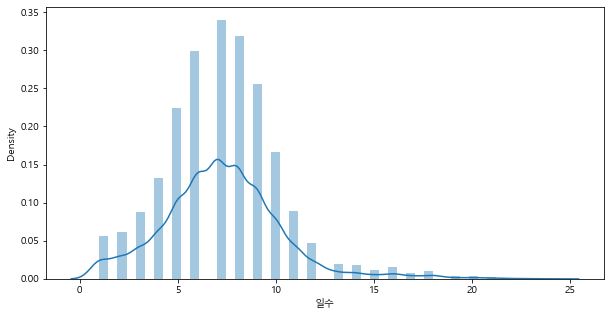

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import seaborn as sns
font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

plt.figure(figsize=(10, 5))
ax = sns.distplot(df["duration"])
ax.set_xlabel("일수")
plt.show()

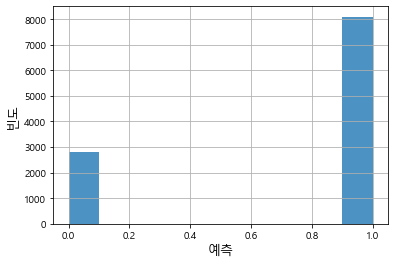

In [16]:
plt.hist(df["pred"], bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

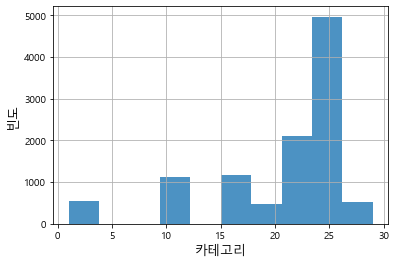

In [17]:
plt.hist(df["category"], bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("카테고리", fontsize=13)
plt.grid()
plt.show()

In [18]:
df["category"].value_counts()

24    3690
22    1487
10    1131
17     944
25     891
23     621
1      393
20     389
26     384
27     267
15     233
28     230
2      152
19      91
29      18
Name: category, dtype: int64

In [19]:
#데이터가 딱 두개로 나뉘는 이쁜 형태가 아님.
df["pred"].value_counts()

1    8097
0    2824
Name: pred, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

## 데이터 샘플링

In [21]:
X=df[["category", "publishedAt_week", "tags_len", "view_count", "play_time", "likes", "dislikes",
      "comment_count", "comments_disabled", "ratings_disabled", "description", "video_len", "channel_len"]]
Y=df["pred"]

In [22]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, Y)

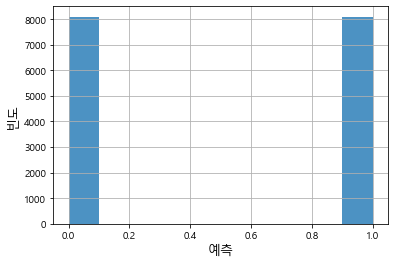

In [23]:
plt.hist(y_resampled, bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

Text(0.5, 0, '종속변수')

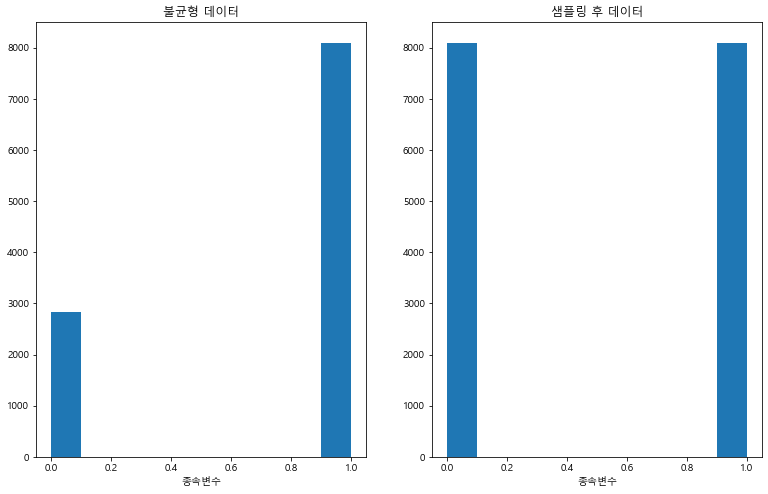

In [24]:
fig = plt.figure(figsize=(13, 8))
axes1 = fig.add_subplot(1, 2, 1)
axes1.hist(Y)
axes1.set_title('불균형 데이터')
axes1.set_xlabel('종속변수')

axes1 = fig.add_subplot(1, 2, 2)
axes1.hist(y_resampled)
axes1.set_title('샘플링 후 데이터')
axes1.set_xlabel('종속변수')

In [25]:
#정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = scaler.fit_transform(X_resampled)

## 군집분석

### K-Means
- 내가 5일 기준은 임의로 정한 기준이라 군집화 확인

#### 기본

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_sc)
kmeams_pred = kmeans.predict(df_sc)

In [27]:
from sklearn.metrics import confusion_matrix

print("Kmeans \n", confusion_matrix(y_resampled, kmeams_pred))

Kmeans 
 [[8092    5]
 [8079   18]]


C:\Users\yhg31\AppData\Local\Temp/ipykernel_14176/4171785245.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\yhg31\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


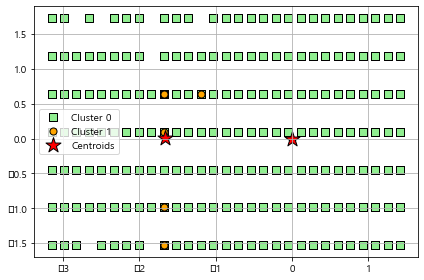

In [28]:
plt.scatter(df_sc[kmeams_pred == 0, 0],
            df_sc[kmeams_pred == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 0')
plt.scatter(df_sc[kmeams_pred == 1, 0],
            df_sc[kmeams_pred == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [29]:
km_df=X_resampled.copy()
km_df["target"]=y_resampled
km_df.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,target
0,24,6,2,5947503,61,53326,105756,139946,0,0,0,11,5,1
1,24,4,33,1185669,980,10805,194,1080,0,0,1,97,9,0
2,24,5,45,227656,758,4089,78,303,0,0,1,71,11,0
3,24,6,9,126183,226,1318,122,139,0,0,1,75,17,0
4,25,4,3,632909,91,3344,156,843,0,0,1,24,9,0


In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

s_coef = silhouette_samples(df_sc, kmeams_pred)
s_mean = silhouette_score(df_sc, kmeams_pred)
s_mean

0.9029187929985119

In [31]:
#데이터가 퍼진 정도. 작을수록 좋음
print("데이터 퍼진 정도 : {0:.3f}".format(kmeans.inertia_))

데이터 퍼진 정도 : 183324.123


In [32]:
inertias = []

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_sc)
    c_labels = kmeans.labels_
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

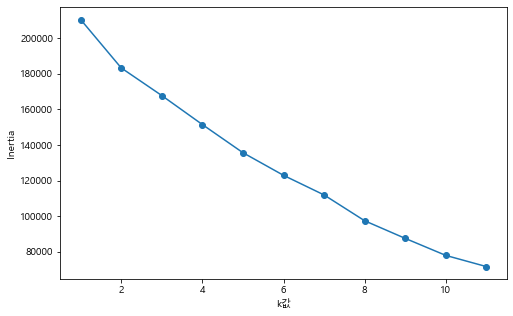

In [33]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 12), inertias, '-o')
plt.xlabel('k값')
plt.ylabel('Inertia')

In [34]:
scsc=pd.DataFrame(df_sc, columns=X_resampled.columns)
scsc

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
0,0.60,1.73,-0.93,2.31,-0.40,0.02,16.70,2.55,-0.06,-0.10,-5.48,-1.60,-0.82
1,0.60,0.65,0.77,0.20,0.02,-0.16,-0.08,-0.08,-0.06,-0.10,0.18,2.48,-0.15
2,0.60,1.19,1.42,-0.22,-0.08,-0.19,-0.10,-0.10,-0.06,-0.10,0.18,1.25,0.18
3,0.60,1.73,-0.55,-0.27,-0.32,-0.20,-0.09,-0.10,-0.06,-0.10,0.18,1.44,1.18
4,0.77,0.65,-0.88,-0.04,-0.38,-0.19,-0.08,-0.09,-0.06,-0.10,0.18,-0.99,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16189,-1.68,0.65,0.27,-0.29,-0.23,-0.19,-0.10,-0.09,-0.06,-0.10,0.18,-0.32,1.69
16190,0.28,0.65,0.16,-0.30,-0.10,-0.18,-0.10,-0.09,-0.06,-0.10,0.18,0.06,2.35
16191,0.44,0.10,-0.44,-0.14,-0.18,-0.18,-0.08,-0.09,-0.06,-0.10,0.18,-0.99,-0.82
16192,0.11,0.65,-0.22,-0.19,-0.14,-0.19,-0.10,-0.09,-0.06,-0.10,0.18,-1.13,-0.99


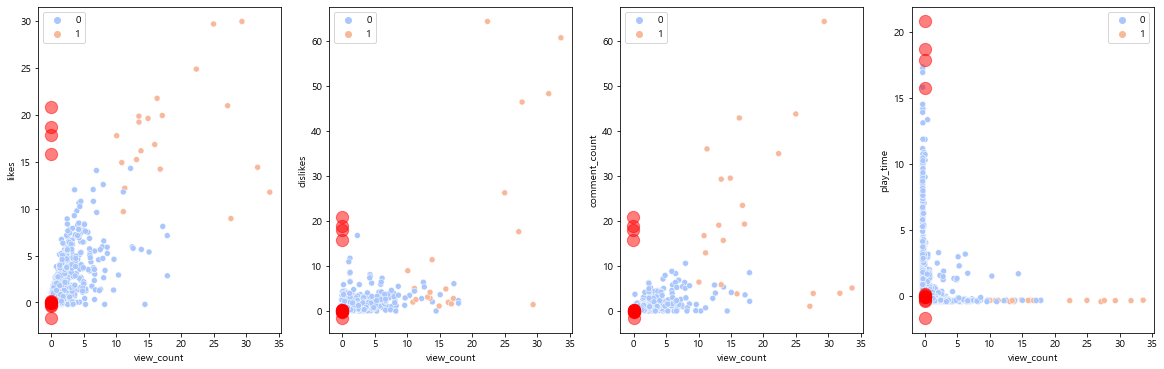

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scsc)
plt.figure(figsize=(20, 6))

plt.subplot(141)
sns.scatterplot(x='view_count', y='likes', data=scsc, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

plt.subplot(142)
sns.scatterplot(x='view_count', y='dislikes', data=scsc, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

plt.subplot(143)
sns.scatterplot(x='view_count', y='comment_count', data=scsc, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

plt.subplot(144)
sns.scatterplot(x='view_count', y='play_time', data=scsc, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

#### PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(km_df)

km_df['pca_x'] = pca_transformed[:,0]
km_df['pca_y'] = pca_transformed[:,1]
km_df.head(3)

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,target,pca_x,pca_y
0,24,6,2,5947503,61,53326,105756,139946,0,0,0,11,5,1,5198938.50,425456.60
1,24,4,33,1185669,980,10805,194,1080,0,0,1,97,9,0,448889.19,76906.67
2,24,5,45,227656,758,4089,78,303,0,0,1,71,11,0,-506140.52,1144.28


In [37]:
km_df["cluster"]=kmeans.labels_
km_df.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,target,pca_x,pca_y,cluster
0,24,6,2,5947503,61,53326,105756,139946,0,0,0,11,5,1,5198938.50,425456.60,0
1,24,4,33,1185669,980,10805,194,1080,0,0,1,97,9,0,448889.19,76906.67,0
2,24,5,45,227656,758,4089,78,303,0,0,1,71,11,0,-506140.52,1144.28,0
3,24,6,9,126183,226,1318,122,139,0,0,1,75,17,0,-607473.29,-4838.17,0
4,25,4,3,632909,91,3344,156,843,0,0,1,24,9,0,-102450.21,36697.40,0


In [38]:
km_df.groupby(["target", "cluster"])["view_count"].count()

target  cluster
0       0          8093
        1             4
1       0          8081
        1            16
Name: view_count, dtype: int64

C:\Users\yhg31\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


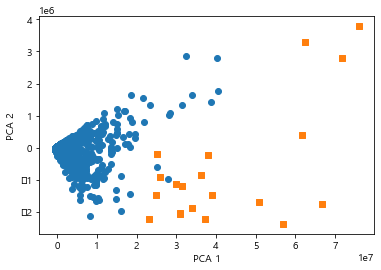

In [39]:
marker0_ind = km_df[km_df['cluster']==0].index
marker1_ind = km_df[km_df['cluster']==1].index

plt.scatter(x=km_df.loc[marker0_ind,'pca_x'], y=km_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=km_df.loc[marker1_ind,'pca_x'], y=km_df.loc[marker1_ind,'pca_y'], marker='s')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [40]:
ss_df = StandardScaler().fit_transform(X_resampled)
ss_df = pd.DataFrame(ss_df, index=X_resampled.index, columns=X_resampled.columns)
ss_df.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
0,0.60,1.73,-0.93,2.31,-0.40,0.02,16.70,2.55,-0.06,-0.10,-5.48,-1.60,-0.82
1,0.60,0.65,0.77,0.20,0.02,-0.16,-0.08,-0.08,-0.06,-0.10,0.18,2.48,-0.15
2,0.60,1.19,1.42,-0.22,-0.08,-0.19,-0.10,-0.10,-0.06,-0.10,0.18,1.25,0.18
3,0.60,1.73,-0.55,-0.27,-0.32,-0.20,-0.09,-0.10,-0.06,-0.10,0.18,1.44,1.18
4,0.77,0.65,-0.88,-0.04,-0.38,-0.19,-0.08,-0.09,-0.06,-0.10,0.18,-0.99,-0.15


In [41]:
pca = PCA(n_components = 13)
pca_array = pca.fit_transform(ss_df)
pca_df = pd.DataFrame(pca_array, index=ss_df.index,
                      columns=[f"pca{num+1}" for num in range(ss_df.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,9.37,-2.80,4.20,-0.11,-1.04,-5.88,-2.48,-0.77,-0.75,2.90,10.92,6.37,1.93
1,-0.18,2.01,0.43,-0.58,0.81,-0.26,-0.27,-0.05,-0.57,1.31,-0.40,-0.08,-0.22
2,-0.41,1.73,0.16,-0.55,1.02,-0.75,-0.18,-0.28,-0.55,-0.04,-0.12,0.09,0.05
3,-0.40,1.22,-0.29,-0.70,0.94,-1.03,-0.73,1.44,0.50,0.56,-0.19,0.11,0.05
4,-0.27,-0.97,-0.00,-0.33,0.44,-0.60,0.02,0.08,1.13,-0.23,0.05,-0.08,-0.08


https://techblog-history-younghunjo1.tistory.com/134

In [42]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(ss_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.94,0.23,0.23
pca2,1.46,0.11,0.34
pca3,1.10,0.08,0.42
pca4,1.07,0.08,0.51
pca5,1.04,0.08,0.59
pca6,1.00,0.08,0.66
pca7,0.94,0.07,0.73
pca8,0.86,0.07,0.80
pca9,0.82,0.06,0.86
pca10,0.69,0.05,0.92


In [43]:
pca1 = PCA(n_components = 8)
pca_array1 = pca1.fit_transform(ss_df)
pca_df1 = pd.DataFrame(pca_array1, index=ss_df.index)
pca_df1.head()

,0,1,2,3,4,5,6,7
0,9.37,-2.80,4.20,-0.11,-1.04,-5.88,-2.48,-0.77
1,-0.18,2.01,0.43,-0.58,0.81,-0.26,-0.27,-0.05
2,-0.41,1.73,0.16,-0.55,1.02,-0.75,-0.18,-0.28
3,-0.40,1.22,-0.29,-0.70,0.94,-1.03,-0.73,1.44
4,-0.27,-0.97,-0.00,-0.33,0.44,-0.60,0.02,0.08


In [44]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(pca_df1)

KMeans(n_clusters=2)

In [45]:
print("데이터 퍼진 정도 : {0:.3f}".format(kmeans1.inertia_))

데이터 퍼진 정도 : 141678.069


In [46]:
s_kmeans1 = KMeans(n_clusters=2)
s_kmeans1.fit(pca_df1)

s_coef = silhouette_samples(pca_df1,y_resampled)
s_mean = silhouette_score(pca_df1, kmeans1.labels_)
s_mean

0.9003390217070372

In [47]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(pca_df1)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [48]:
n_clusters = range(2, 15)

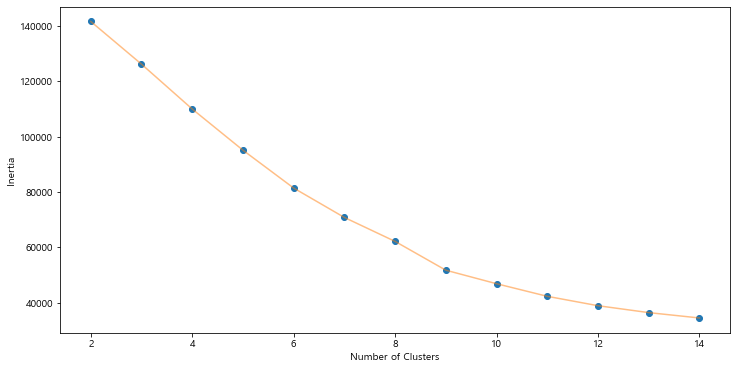

In [49]:
change_n_clusters(n_clusters, pca_df1)

In [50]:
scsc.corr()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
category,1.00,0.02,0.10,-0.13,0.08,-0.19,-0.07,-0.10,0.02,-0.03,-0.04,0.10,0.03
publishedAt_week,0.02,1.00,-0.02,-0.01,-0.03,-0.01,0.01,-0.01,-0.01,-0.01,0.02,0.02,-0.06
tags_len,0.10,-0.02,1.00,0.01,-0.04,-0.00,-0.00,-0.01,0.02,0.03,0.07,0.25,0.12
view_count,-0.13,-0.01,0.01,1.00,-0.05,0.81,0.67,0.66,0.06,0.01,0.02,0.00,0.03
play_time,0.08,-0.03,-0.04,-0.05,1.00,-0.04,-0.02,-0.02,0.01,-0.01,-0.00,0.06,-0.07
likes,-0.19,-0.01,-0.00,0.81,-0.04,1.00,0.49,0.74,0.01,-0.02,0.03,-0.01,0.04
dislikes,-0.07,0.01,-0.00,0.67,-0.02,0.49,1.00,0.38,0.02,-0.01,-0.03,-0.01,0.00
comment_count,-0.10,-0.01,-0.01,0.66,-0.02,0.74,0.38,1.00,-0.01,-0.00,0.01,-0.03,0.01
comments_disabled,0.02,-0.01,0.02,0.06,0.01,0.01,0.02,-0.01,1.00,0.06,-0.02,-0.02,-0.03
ratings_disabled,-0.03,-0.01,0.03,0.01,-0.01,-0.02,-0.01,-0.00,0.06,1.00,0.00,0.03,0.02


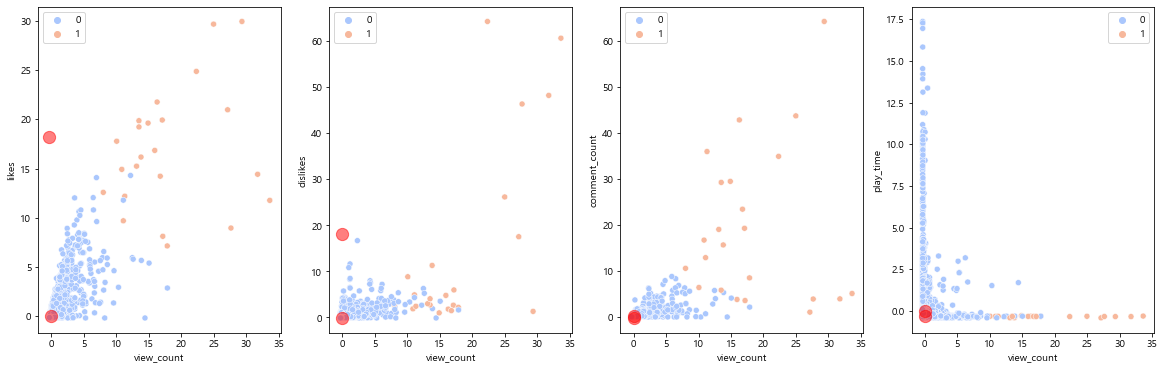

In [51]:
s_kmeans1 = KMeans(n_clusters=2)
s_kmeans1.fit(scsc)
plt.figure(figsize=(20, 6))

plt.subplot(141)
sns.scatterplot(x='view_count', y='likes', data=scsc, hue=s_kmeans1.labels_,palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 2], s_kmeans1.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(142)
sns.scatterplot(x='view_count', y='dislikes', data=scsc, hue=s_kmeans1.labels_, palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 1], s_kmeans1.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(143)
sns.scatterplot(x='view_count', y='comment_count', data=scsc, hue=s_kmeans1.labels_, palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 1], s_kmeans1.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

plt.subplot(144)
sns.scatterplot(x='view_count', y='play_time', data=scsc, hue=s_kmeans1.labels_, palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 1], s_kmeans1.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

### DB-SCAN

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5)
dbs_pred = pd.DataFrame(dbscan.fit_predict(df_sc))
dbs_pred.columns=['predict']

df_dbs = pd.concat([X_resampled, dbs_pred],axis=1)
df_dbs

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,predict
0,24,6,2,5947503,61,53326,105756,139946,0,0,0,11,5,-1
1,24,4,33,1185669,980,10805,194,1080,0,0,1,97,9,-1
2,24,5,45,227656,758,4089,78,303,0,0,1,71,11,0
3,24,6,9,126183,226,1318,122,139,0,0,1,75,17,1
4,25,4,3,632909,91,3344,156,843,0,0,1,24,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16189,10,4,24,79537,416,3179,26,612,0,0,1,38,20,-1
16190,22,4,22,50205,718,5381,28,742,0,0,1,46,24,-1
16191,23,3,11,423896,543,6233,152,677,0,0,1,24,5,24
16192,21,4,15,306202,620,3823,80,948,0,0,1,21,4,2


In [53]:
df_dbs["predict"].value_counts()

-1      6294
 24     1577
 2      1370
 10     1326
 5      1158
        ... 
 97        4
 136       4
 175       4
 138       4
 127       4
Name: predict, Length: 180, dtype: int64

### SOM

In [54]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 13, sigma = 1, learning_rate = 0.5)
som.random_weights_init(df_sc)
som.train_random(data = df_sc, num_iteration = 100)

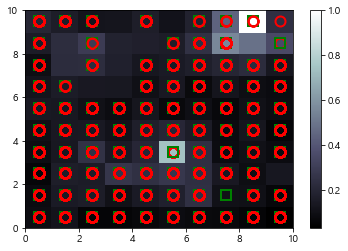

In [55]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(df_sc):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y_resampled[i]],
         markeredgecolor = colors[y_resampled[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

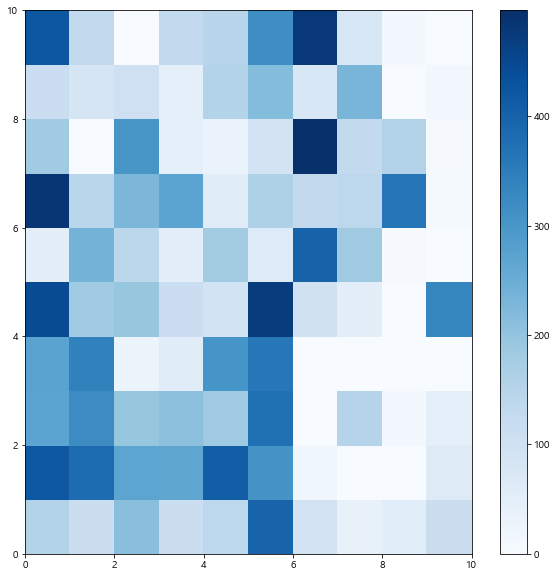

In [56]:
plt.figure(figsize=(10, 10))
frequencies = np.zeros((10, 10))
for position, values in som.win_map(df_sc).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

In [57]:
#이상 데이터
mappings = som.win_map(df_sc)
frauds = np.concatenate((mappings[(1,4)], mappings[(2,9)]), axis = 0)
frauds = scaler.inverse_transform(frauds)
frauds.shape

(453, 13)

In [58]:
frauds

array([[25.,  0., 19., ...,  1., 74.,  6.],
       [25.,  2.,  8., ...,  1., 62., 11.],
       [25.,  0.,  9., ...,  1., 64., 11.],
       ...,
       [22.,  5.,  1., ...,  1., 21.,  7.],
       [21.,  5., 13., ...,  1.,  9.,  8.],
       [22.,  5., 10., ...,  1.,  4.,  5.]])

In [59]:
som1 = MiniSom(x = 10, y = 10, input_len = 13, sigma = 1, learning_rate = 0.5)
som1.pca_weights_init(df_sc)
som1.train_random(data = df_sc, num_iteration = 100)

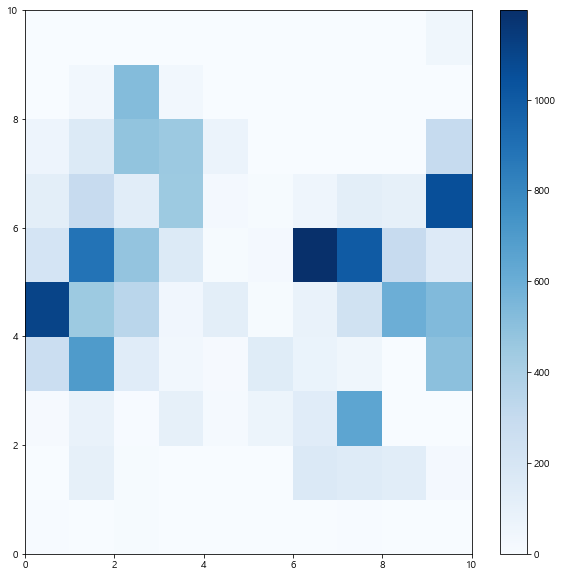

In [60]:
plt.figure(figsize=(10, 10))
frequencies = np.zeros((10, 10))
for position, values in som1.win_map(df_sc).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

### GMM

In [61]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm.fit(df_sc)
gmm_cluster_labels = gmm.predict(df_sc)

X_resampled['gmm_cluster'] = gmm_cluster_labels
X_resampled['target'] = y_resampled

X1 = X_resampled.groupby(['target'])['gmm_cluster'].value_counts()
X1

target  gmm_cluster
0       0              6963
        1              1134
1       0              7294
        1               803
Name: gmm_cluster, dtype: int64

In [62]:
target_lst = np.unique(y_resampled)
markers = ['o','s']

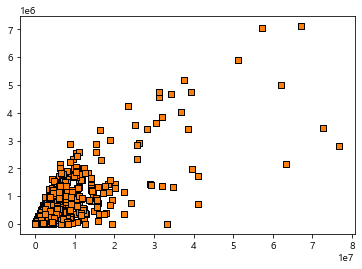

In [63]:
for target in target_lst:
    target_cluster = X_resampled[X_resampled['target']==target]
    plt.scatter(x=X_resampled['view_count'],
               y=X_resampled['likes'],
               edgecolor='k', marker=markers[target])
plt.show()

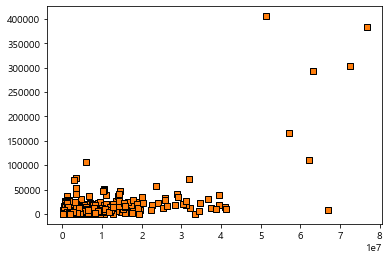

In [64]:
for target in target_lst:
    target_cluster = X_resampled[X_resampled['target']==target]
    plt.scatter(x=X_resampled['view_count'],
               y=X_resampled['dislikes'],
               edgecolor='k', marker=markers[target])
plt.show()

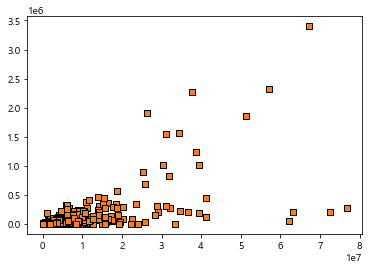

In [65]:
for target in target_lst:
    target_cluster = X_resampled[X_resampled['target']==target]
    plt.scatter(x=X_resampled['view_count'],
               y=X_resampled['comment_count'],
               edgecolor='k', marker=markers[target])
plt.show()